# eda

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
df_train = pd.read_csv('../data/train.csv', index_col=0)

In [29]:
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


In [30]:
df_train.shape

(40455, 10)

In [31]:
df_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  float64
dtypes: float64(7), object(3)
memory usage: 3.4+ MB


In [33]:
df_train.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [34]:
df_train[df_train.duplicated() == True].value_counts()

carat  cut      color  clarity  depth  table  x     y     z     price
0.79   Ideal    G      SI1      62.3   57.0   5.90  5.85  3.66  7.972    2
0.30   Ideal    G      IF       62.1   55.0   4.32  4.35  2.69  6.760    1
1.00   Premium  G      SI1      60.1   61.0   6.44  6.40  3.86  8.198    1
1.10   Premium  E      SI2      59.1   60.0   6.77  6.70  3.98  8.511    1
1.09   Premium  H      SI2      61.2   62.0   6.63  6.58  4.04  8.388    1
                                                                        ..
0.35   Premium  J      VS1      62.4   58.0   5.67  5.64  3.53  6.855    1
       Fair     G      VS2      65.9   54.0   5.57  5.53  3.66  7.255    1
0.34   Ideal    F      IF       61.7   55.0   4.49  4.52  2.78  7.151    1
0.33   Ideal    H      VVS1     61.7   55.0   4.48  4.50  2.77  6.593    1
3.01   Fair     I      SI2      65.8   56.0   8.99  8.94  5.90  9.811    1
Length: 84, dtype: int64

In [35]:
df_train[df_train.duplicated() == True].value_counts().sum()

85

In [36]:
df_train.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


In [37]:
df_train.describe(include='object').T

,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


### variable respuesta: price

### variables predictoras:
### variables numéricas: carat, depth, table, x, y, z
### variables categóricas: cut, color, clarity

/var/folders/q3/mvdqcsqd66g2sjy7y39hmm7c0000gn/T/ipykernel_16989/4069694389.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
/Users/jmpas/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


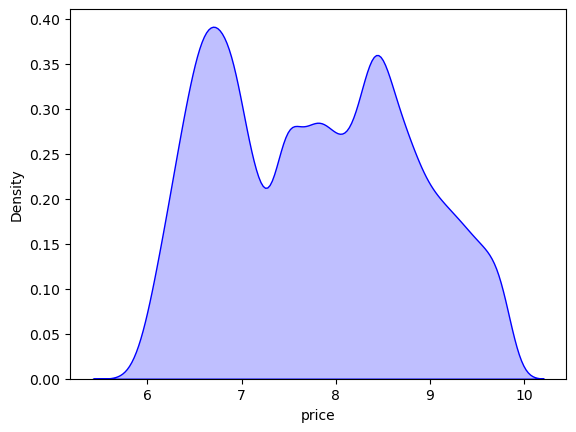

In [38]:
# vamos a ver visualmente como está distribuida la variable respuesta

sns.distplot(
    df_train.price, 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});